# Week 14 — Model Representation & Cost Function

Real-life analogy: Throwing a ball at a target 🎯

**Model** = your throwing technique

**Prediction** = where ball lands

**Cost/Error** = distance from target

**Training** = improving technique to reduce distance

#  Model Representation

Model equation: `**y = w × x + b**`

**x** = input (feature) like house size

**w** = how strongly x affects y (rate)

**b** = starting value (base value)

**y** = predicted output

# Model in Python (OOP)

In [3]:
# Equation: y = w*x + b
class LinearModel:
    def __init__(self, w, b):
        # Store model parameters inside the object
        # w = weight (slope)
        # b = bias (intercept)
        self.w = w
        self.b = b

    def predict(self, x):
        # Step 1: multiply x with weight w
        wx = self.w * x

        # Step 2: add bias b
        y = wx + self.b

        # Step 3: return predicted output y
        return y

model = LinearModel(w=2, b=1)       # create model
result = model.predict(5)           # predict for x = 5
print("Prediction:", result)        # expected: 11

Prediction: 11


#  Cost Function 

A model can be right or wrong. We need a number that tells us how wrong. That number is called cost (or loss).

Error for one point: **error** = **predicted** − **actual**

If predicted is far from actual → `error is big` → `model is not good.`

# MSE 

In [4]:
def mean_squared_error(y_actual, y_pred):
    # n = how many data points
    n = len(y_actual)

    # total will store sum of squared errors
    total = 0

    # loop through each point
    for i in range(n):
        # error = predicted - actual
        error = y_pred[i] - y_actual[i]

        # squared error
        squared_error = error ** 2

        # add to total
        total += squared_error

    # average (mean)
    mse = total / n
    return mse

# Example
y_actual = [3, 5, 7]
y_pred   = [2.5, 5.5, 6]
print("MSE:", mean_squared_error(y_actual, y_pred))

MSE: 0.5


## MSE  — NumPy

In [6]:
import numpy as np

# Convert lists into NumPy arrays
y_actual = np.array([3, 5, 7], dtype=float)
y_pred   = np.array([2.5, 5.5, 6], dtype=float)

# Data science style MSE (vectorized)
mse = np.mean((y_pred - y_actual) ** 2)

print("MSE ", mse)

MSE  0.5


# Connect Model + MSE (Full Pipeline)

In [7]:
# Pipeline: Model -> Predictions -> MSE
class LinearModel:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def predict(self, x):
        return self.w * x + self.b

def mean_squared_error(y_actual, y_pred):
    n = len(y_actual)
    total = 0
    for i in range(n):
        total += (y_pred[i] - y_actual[i]) ** 2
    return total / n

# Dataset
x = [1, 2, 3, 4, 5]
y_actual = [3, 5, 7, 9, 11]   # true: y = 2x + 1

# Try any model
model = LinearModel(w=1.4, b=1.2)

# Make predictions
y_pred = []
for xi in x:
    y_pred.append(model.predict(xi))

# Calculate cost
cost = mean_squared_error(y_actual, y_pred)

print("Predictions:", y_pred)
print("Cost (MSE):", cost)

Predictions: [2.5999999999999996, 4.0, 5.3999999999999995, 6.8, 8.2]
Cost (MSE): 3.280000000000001


# Gradient Descent (Training)

Gradient Descent is the learning method that finds better w and b values. It repeats small updates until MSE becomes small.

# Gradient Descent Concept (Step-by-step)

What happens in every epoch:

1) Use current w,b to make predictions
2) Calculate MSE (cost)
3) Find direction to reduce cost (gradients dw, db)
4) Update w,b with a small step (learning rate α)
5) Repeat

# Update Rule

Update equations:
    
w = w − α × dw

b = b − α × db

Meaning: If dw is positive, w decreases a bit. If dw is negative, w increases a bit.

# Gradient Descent Code

In [9]:
def predict_all(x, w, b):
    # Predict y for ALL x values
    y_pred = []
    for xi in x:
        y_pred.append(w * xi + b)
    return y_pred

def mean_squared_error(y_actual, y_pred):
    # Compute MSE using simple loop
    n = len(y_actual)
    total = 0
    for i in range(n):
        total += (y_pred[i] - y_actual[i]) ** 2
    return total / n

def gradient_descent(x, y, w, b, alpha, epochs):
    # n = number of points
    n = len(x)

    for epoch in range(epochs):
        # 1) Predictions with current parameters
        y_pred = predict_all(x, w, b)

        # 2) Compute gradients (dw and db)
        # Start from 0
        dw = 0
        db = 0

        for i in range(n):
            # error for this point
            error = y_pred[i] - y[i]

            # contribution to gradient of w and b
            dw += error * x[i]
            db += error

        # 3) Average gradients and scale for MSE derivative
        dw = (2 / n) * dw
        db = (2 / n) * db

        # 4) Update parameters in the direction that reduces MSE
        w = w - alpha * dw
        b = b - alpha * db

        # 5) Print progress
        if epoch % 10 == 0:
            cost = mean_squared_error(y, predict_all(x, w, b))
            print("Epoch", epoch, "| w =", round(w,4), "| b =", round(b,4), "| MSE =", round(cost,4))

    return w, b

# ----- Example dataset (true: y = 2x + 1) -----
x = [1, 2, 3, 4, 5]
y = [3, 5, 7, 9, 11]

# Start with wrong w,b
w0 = 0.0
b0 = 0.0

# Train
w_final, b_final = gradient_descent(x, y, w0, b0, alpha=0.05, epochs=120)

print("Final:", "w =", round(w_final,4), "b =", round(b_final,4))

Epoch 0 | w = 2.5 | b = 0.7 | MSE = 1.94
Epoch 10 | w = 2.0951 | b = 0.6566 | MSE = 0.0215
Epoch 20 | w = 2.0802 | b = 0.7104 | MSE = 0.0153
Epoch 30 | w = 2.0676 | b = 0.7558 | MSE = 0.0109
Epoch 40 | w = 2.057 | b = 0.7941 | MSE = 0.0077
Epoch 50 | w = 2.0481 | b = 0.8264 | MSE = 0.0055
Epoch 60 | w = 2.0406 | b = 0.8536 | MSE = 0.0039
Epoch 70 | w = 2.0342 | b = 0.8765 | MSE = 0.0028
Epoch 80 | w = 2.0288 | b = 0.8959 | MSE = 0.002
Epoch 90 | w = 2.0243 | b = 0.9122 | MSE = 0.0014
Epoch 100 | w = 2.0205 | b = 0.926 | MSE = 0.001
Epoch 110 | w = 2.0173 | b = 0.9376 | MSE = 0.0007
Final: w = 2.0148 b = 0.9465


## Visual: MSE Decreasing (Plot)

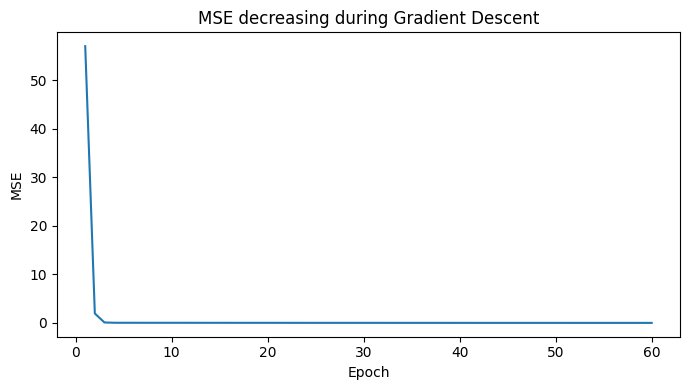

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# dataset
x = np.array([1,2,3,4,5], dtype=float)
y = np.array([3,5,7,9,11], dtype=float)   # true: y=2x+1

# start values
w, b = 0.0, 0.0
alpha = 0.05
epochs = 60
costs = []

n = len(x)

for epoch in range(epochs):
    # predictions
    y_pred = w*x + b

    # cost
    cost = np.mean((y_pred - y)**2)
    costs.append(cost)

    # gradients
    dw = (2/n) * np.sum((y_pred - y) * x)
    db = (2/n) * np.sum((y_pred - y))

    # update
    w = w - alpha*dw
    b = b - alpha*db

# plot
plt.figure(figsize=(7,4))
plt.plot(range(1, epochs+1), costs)
plt.title("MSE decreasing during Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.tight_layout()
plt.show()